In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import cross_val_score, validation_curve
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC

np.set_printoptions(precision=2)

### Conjunto de dados

In [3]:
fruits = pd.read_table('../Mod_1/Dfs/fruit_data_with_colors.txt')

feature_names = ['height', 'width', 'mass', 'color_score']
X_fruits = fruits[feature_names]
y_fruits = fruits['fruit_label']
target_names = ['apple', 'mandarin', 'orange', 'lemon']

X_fruits_2d = fruits[['height', 'width']]
y_fruits_2d = fruits['fruit_label']

# Validação Cruzada

### Exemplo baseado no classificador KNN no conjunto de dados de frutas (2 características)

In [21]:
clf = KNeighborsClassifier(n_neighbors=5)
X = X_fruits_2d.values
y = y_fruits_2d.values
cv_scores = cross_val_score(clf, X, y, cv=5)

print(f'Pontuação da validação cruzada: {cv_scores}')
print(f'Pontuação média da validação cruzada: {np.mean(cv_scores):.3f}')

Pontuação da validação cruzada: [0.75 0.75 0.83 0.83 0.82]
Pontuação média da validação cruzada: 0.797


### Nota sobre performace da validação-cruzada para cenários mais avançados.

Em alguns casos (por exemplo, quando as características possuem escalas muito diferentes), vimos a necessidade de escalonar ou normalizar o conjunto de treino e teste antes de usá-los com um classificador. A maneira correta de implementar a validação cruzada quando se é necessário escalonar os dados é não escalonar o conjunto de dados inteiro com uma única transformação, pois temos perda indireta de informações no conjunto de dados de treinamento sobre todo conjunto de dados, incluindo o conjunto de teste. Para fazer isso, a maneira mais fácil no scikit-learn é usar pipelines.

## Exemplo de curva de validação

In [5]:
param_range = np.logspace(-3, 3, 4)
train_scores, test_scores = validation_curve(SVC(), X, y,
                                             param_name='gamma', param_range=param_range, cv=3)

In [6]:
print(train_scores)

[[0.46 0.44 0.42]
 [0.85 0.72 0.75]
 [0.92 0.9  0.93]
 [1.   1.   0.97]]


In [7]:
print(test_scores)

[[0.5  0.3  0.32]
 [0.85 0.7  0.63]
 [0.55 0.85 0.68]
 [0.4  0.2  0.37]]


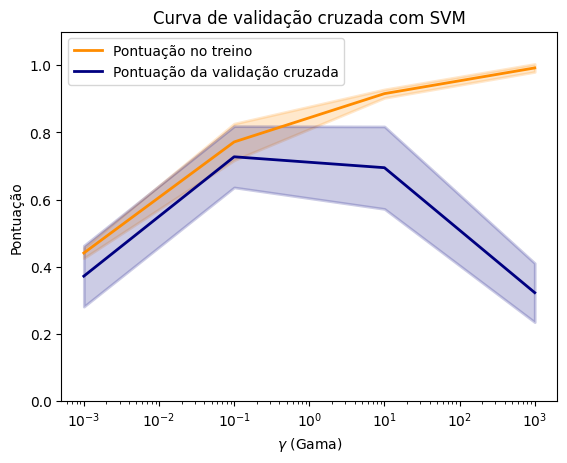

In [8]:
plt.figure()

train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)

plt.title('Curva de validação cruzada com SVM')
plt.xlabel('$\gamma$ (Gama)')
plt.ylabel('Pontuação')
plt.ylim(0.0, 1.1)
lw = 2

plt.semilogx(param_range, train_scores_mean, label='Pontuação no treino',
             color='darkorange', lw=lw)

plt.fill_between(param_range, train_scores_mean - train_scores_std, 
                 train_scores_mean + train_scores_std, alpha=.2,
                 color='darkorange', lw=lw)

plt.semilogx(param_range, test_scores_mean, label='Pontuação da validação cruzada',
             color='navy', lw=lw)

plt.fill_between(param_range, test_scores_mean - test_scores_std, 
                 test_scores_mean + test_scores_std, alpha=.2,
                 color='navy', lw=lw)

plt.legend(loc='best')
plt.show()
